<a href="https://colab.research.google.com/github/HONAJIPHAD/capstion-project-of-telecom-churn/blob/main/Copy_of_Telecom_Churn_Analysis_Commit_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

###Let us import the liabreries and .csv file into Notebook, after that let us perform basic operations such as info and describe

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/New folder/New folder/Telecom Churn.csv')

#Understand More About The Data

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

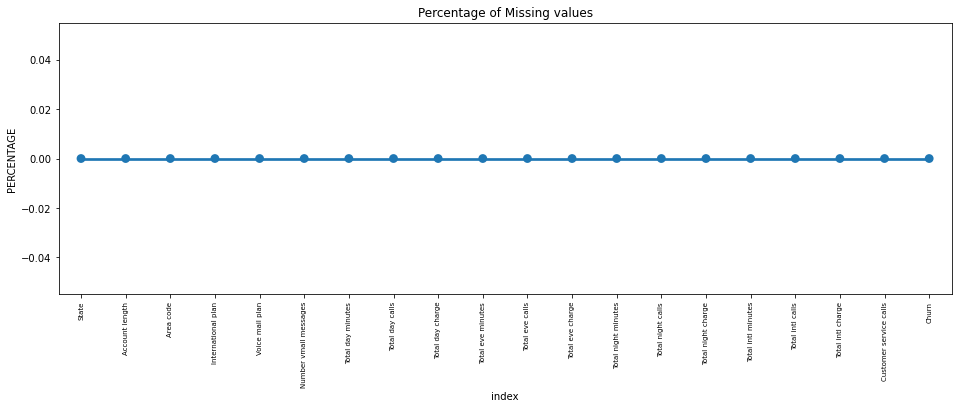

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

##Checking for Missing And Duplicate values

In [5]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()
#as we see there are no missing values present in nay column.

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

out of which there are 1 boolean data type i.e churn

8 float data type,

8integer data type,

3 object data type i.e catagarical value are there.

There are no missing value present so no need to do the missing value imputation,

And also there are no duplicate value present.

#Exploratory Data Analysis Of The Data Set

Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [7]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


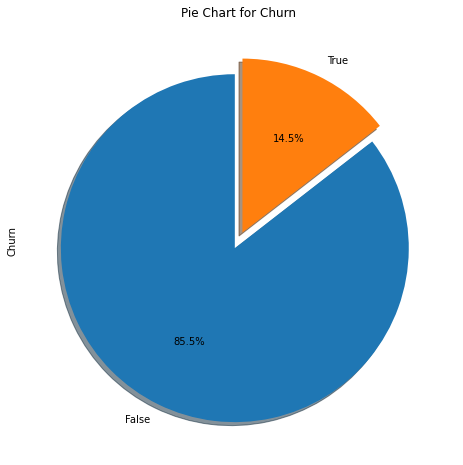

In [8]:
#To get the pie chart to analyze churn
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

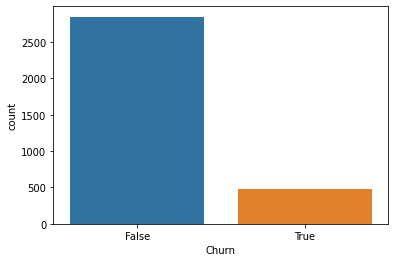

In [9]:
#let's see churn by using countplot
sns.countplot(x=df.Churn)

After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn

#Analyzing State Column

In [10]:
#printing the unique value of sate column
df['State'].nunique()

51

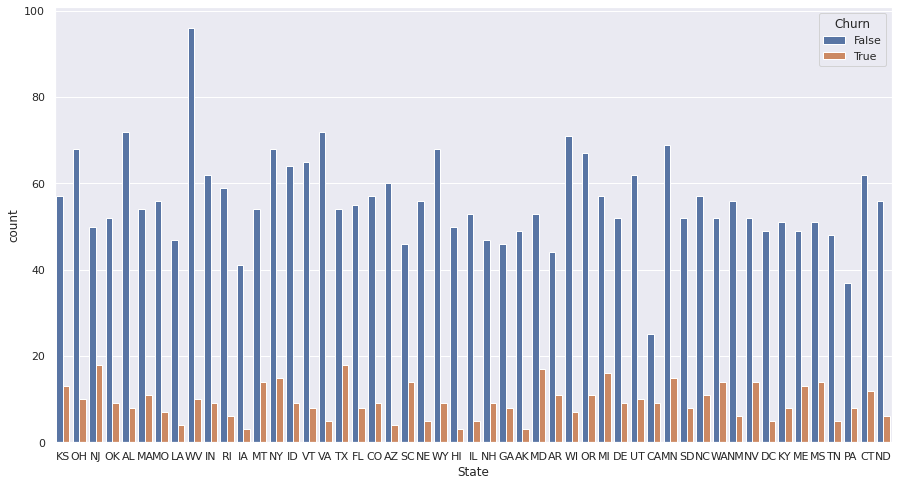

In [11]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df)
plt.show()

As soon as we get the percentage let us see top 10 states who are moving towards churn

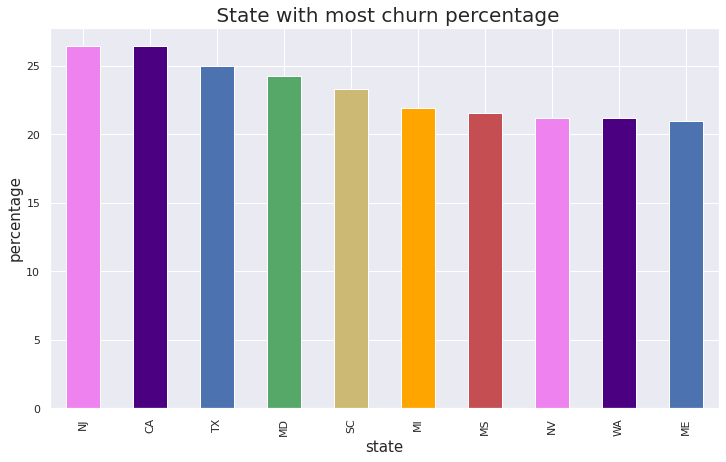

In [12]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

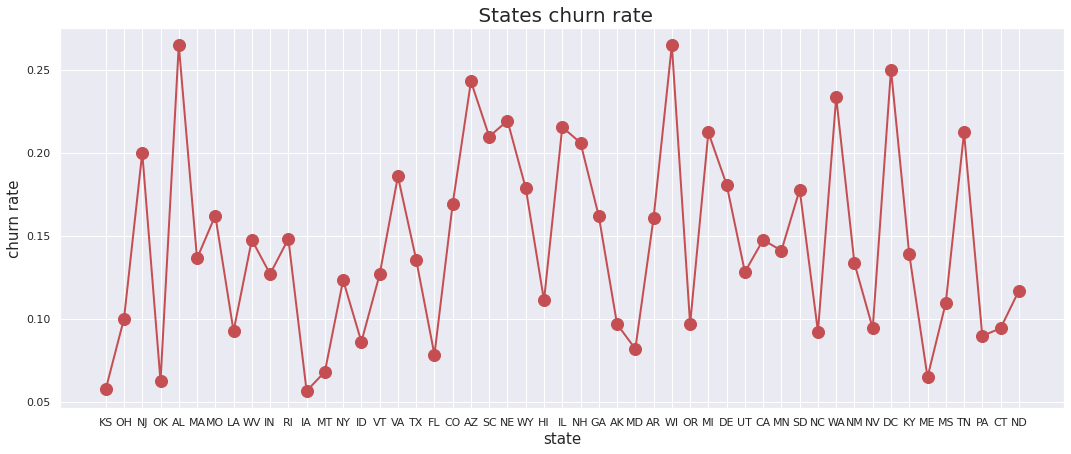

In [13]:
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

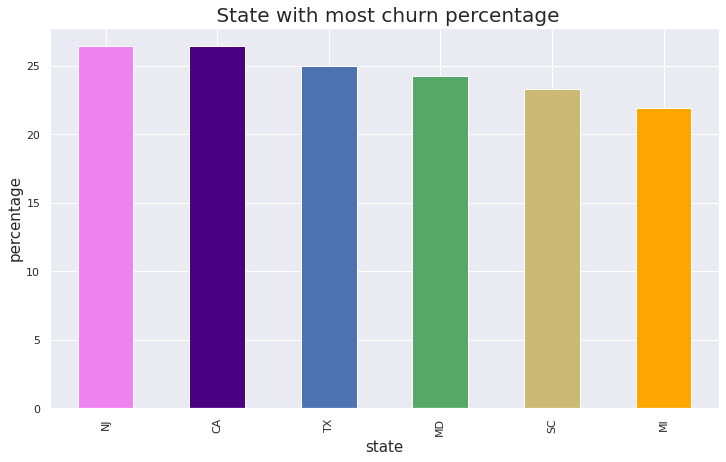

In [14]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [15]:
#calculate State vs Churn percentage
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [18]:
#show the most churn state of top 10 by acending the above list
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

There is 51 unique state present who have different churn rate.

From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.

The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.

#Analyzing "Area Code" column

In [4]:
#calculate Area code vs Churn percentage
Area_code_data = pd.crosstab(df["Area code"],df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


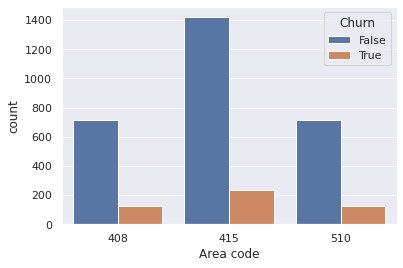

In [5]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Area code', hue="Churn", data=df)
plt.show()

In the above data, we notice that there is only 3 unique value are there i.e408,415,510 and the churn rate of these area codes are almost same.

we don't think there is any kind of relation present between the "area code" and"churn" due to which the customer leaves the operator.

#Analyzing "Account Length" column

In [6]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == bool(True)]
not_churn_df = df[df["Churn"] == bool(False)]

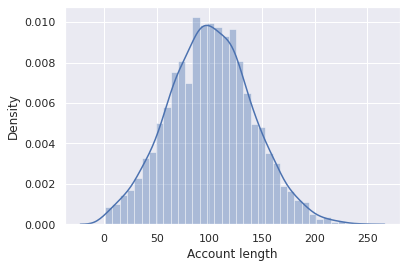

In [7]:
#Account length vs Churn
sns.distplot(df['Account length'])

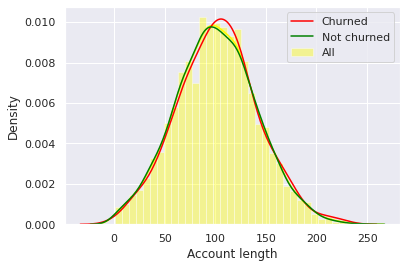

In [8]:
#comparison of churned account length and not churned account length 
sns.distplot(df['Account length'],color = 'yellow',label="All")
sns.distplot(churn_df['Account length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['Account length'],color = 'green',hist= False,label="Not churned")
plt.legend()

After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.

#Analyzing "International Plan" column

In [5]:
#Show the unique data of "International plan"
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
#Calculate the International Plan vs Churn percentage 
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


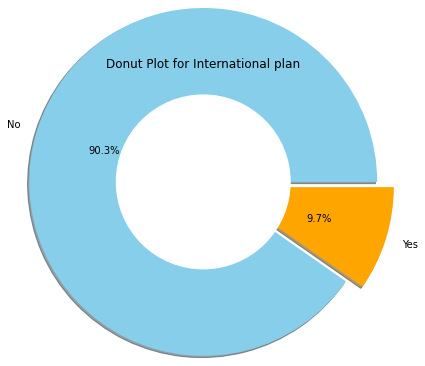

In [7]:
#To get the Donut Plot to analyze International Plan
data = df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['skyblue' ,'orange'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

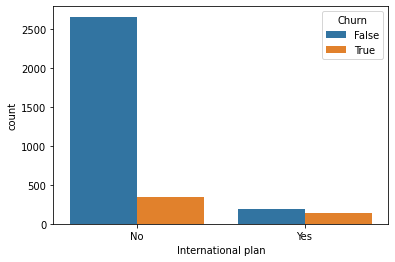

In [8]:
#Analysing by using countplot
sns.countplot(x='International plan',hue="Churn",data = df)

From the above data we get

There are 3010 customers who dont have a international plan.

There are 323 customers who have a international plan.

Among those who have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan only 11.4 % people churn.

So basically the people who bought International plans are churning in big numbers.

Probably because of connectivity issues or high call charge.

#Analyzing "Voice Mail Plan" column

In [9]:
#show the unique value of the "Voice mail plan" column
df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(df["Voice mail plan"],df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


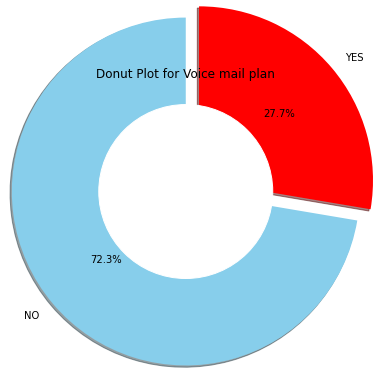

In [11]:
#To get the Donut Plot to analyze Voice mail plan
data = df['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

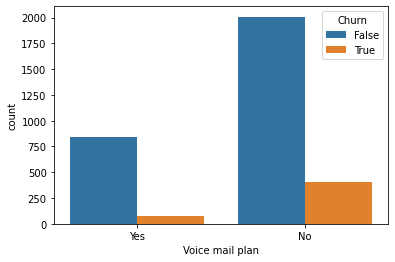

In [12]:
#Analysing by using countplot
sns.countplot(x='Voice mail plan',hue="Churn",data = df)

As we can see there is are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e number of voice mail, let's see what it gives to us.

#Analyzing "Number vmail messages" column

In [13]:
#show the data of 'Number vmail messages' 
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [14]:
#Printing the data of 'Number vmail messages'
df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

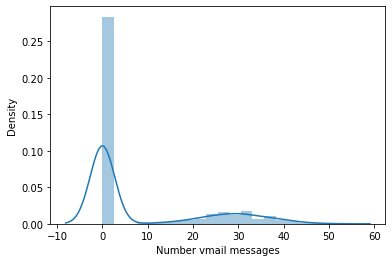

In [19]:
#Analysing by using displot diagram
sns.distplot(df['Number vmail messages'])

<Figure size 720x576 with 0 Axes>

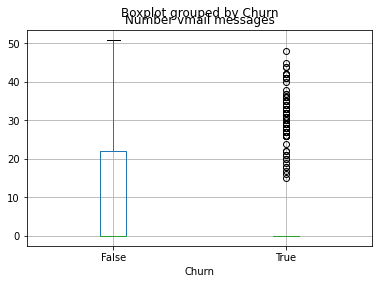

In [20]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn for that, we need to improve the voice mail quality.

#Analyzing "Customer service calls" column

In [21]:
#Printing the data of customer service calls 
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [22]:
#Calculating the Customer service calls vs Churn percentage
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


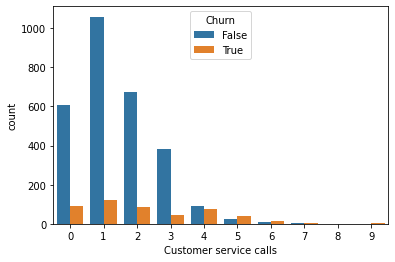

In [23]:
#Analysing using countplot
sns.countplot(x='Customer service calls',hue="Churn",data = df)

It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,

And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

So operator should work to improve the service call.

#Analyzing all calls minutes,all calls, all calls charge together

As these data sets are numerical data type, so for analysing with the 'churn' which is a catagorical data set, We are using mean, median, and box plots.

In [24]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day calls'].mean())

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64


In [25]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day minutes'].mean())

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64


In [26]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total day charge'].mean())

Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


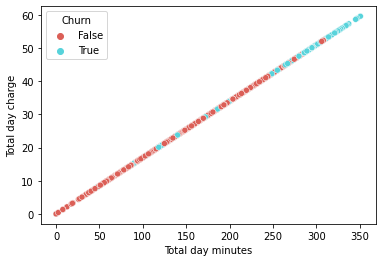

In [27]:
#show the relation using scatter plot
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df,palette='hls')

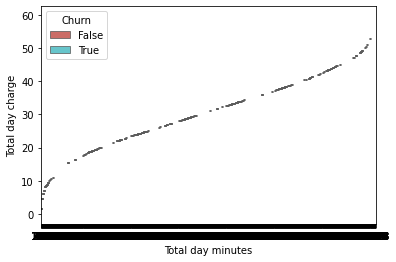

In [28]:
#show the relation using box plot plot
sns.boxplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df,palette='hls')

In [29]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve calls'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64


In [30]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve minutes'].mean())

Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64


In [31]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


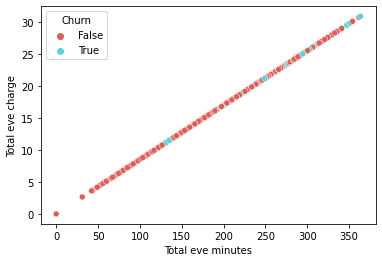

In [32]:
#show the relation using scatter plot
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df,palette='hls')

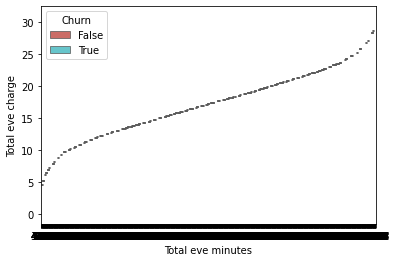

In [33]:
#show the relation using box plot plot
sns.boxplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df,palette='hls')

In [34]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night calls'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64


In [36]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night charge'].mean())

Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


In [35]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total night minutes'].mean())

Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64


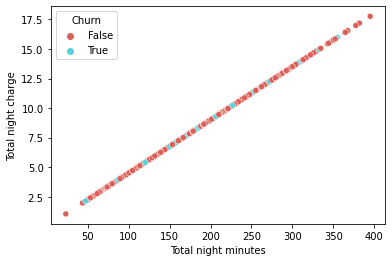

In [37]:
#show the relation using scatter plot
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df,palette='hls')

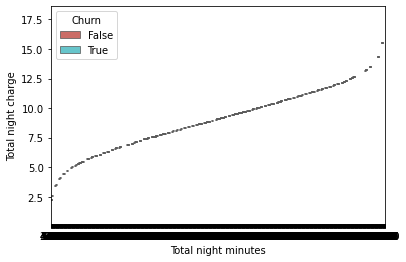

In [38]:
#show the relation using box plot
sns.boxplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df,palette='hls')

In [39]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())

Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


In [40]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())

Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


In [41]:
#Print the mean value of churned and not churned customer 
print(df.groupby(["Churn"])['Total intl minutes'].mean())

Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64


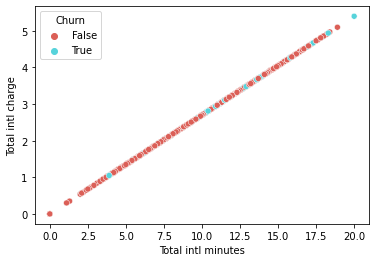

In [42]:
#show the relation using scatter plot
sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data=df,palette='hls')

In [43]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_charge_perm = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_charge_perm = df['Total night charge'].mean()/df['Total night minutes'].mean()
int_charge_perm= df['Total intl charge'].mean()/df['Total intl minutes'].mean()

In [44]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.1700030073913066, 0.08500104871485774, 0.04500041448440013, 0.2700500279887098]


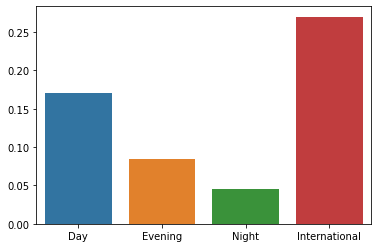

In [45]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

After analyzing the above dataset we have noticed that total day/night/eve minutes/call/charges are not put any kind of cause for churn rate. But international call charges are high as compare to others it's an obvious thing but that may be a cause for international plan customers to churn out

#Graphical Analysis

UNIVARIATE ANALYSIS

In Univariate Analysis we analyze data over a single column from the numerical dataset, for this we use 3 types of plot which are box plot, strip plot, dis plot.

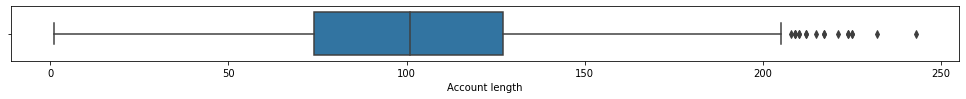

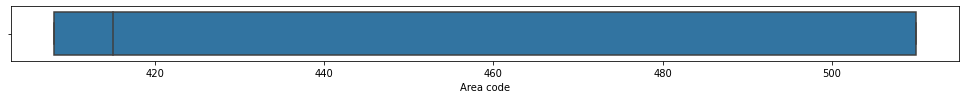

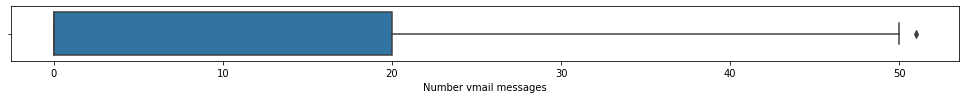

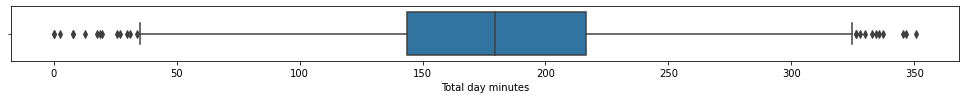

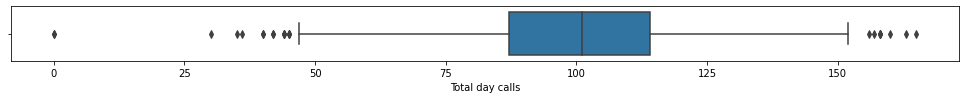

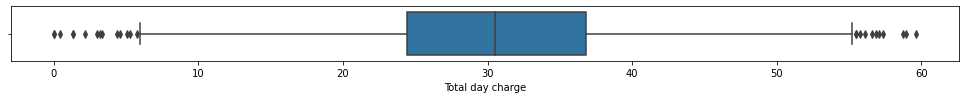

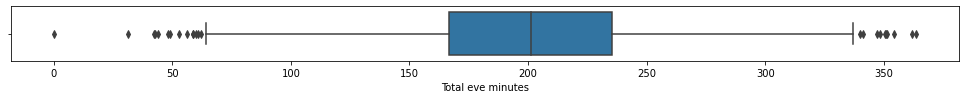

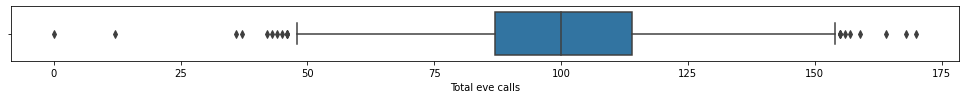

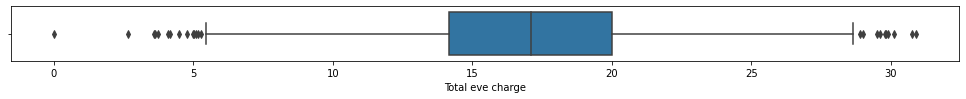

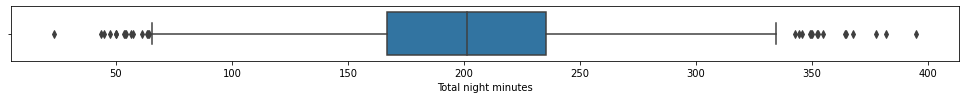

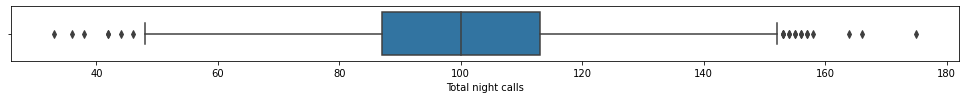

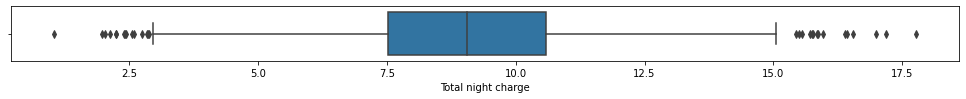

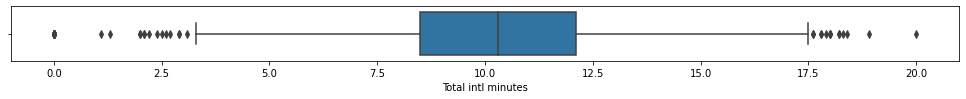

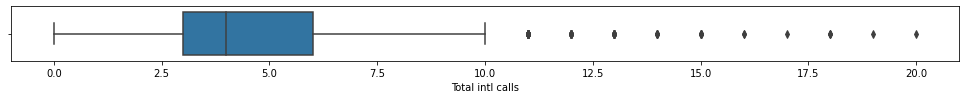

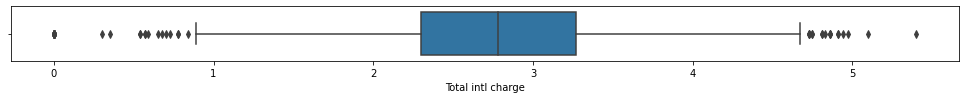

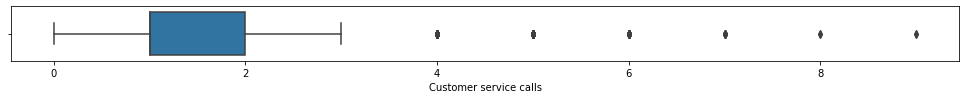

In [46]:
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

<Figure size 1224x72 with 0 Axes>

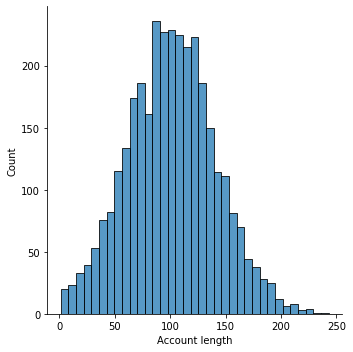

<Figure size 1224x72 with 0 Axes>

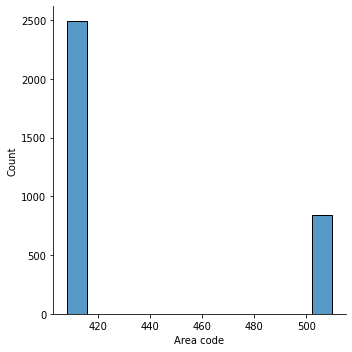

<Figure size 1224x72 with 0 Axes>

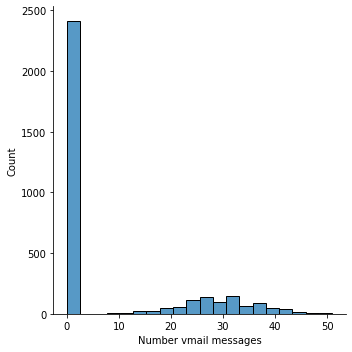

<Figure size 1224x72 with 0 Axes>

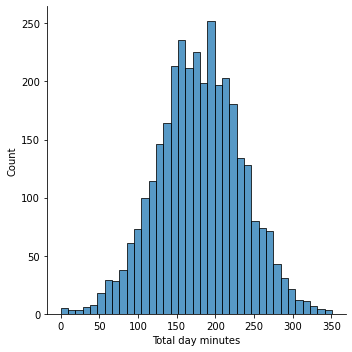

<Figure size 1224x72 with 0 Axes>

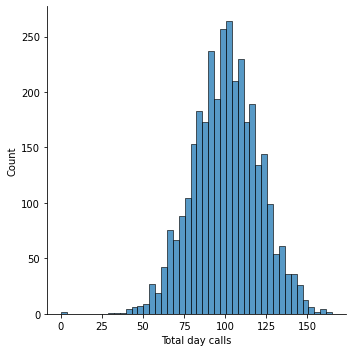

<Figure size 1224x72 with 0 Axes>

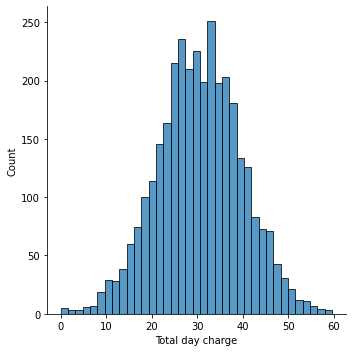

<Figure size 1224x72 with 0 Axes>

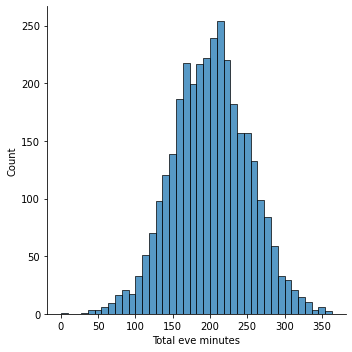

<Figure size 1224x72 with 0 Axes>

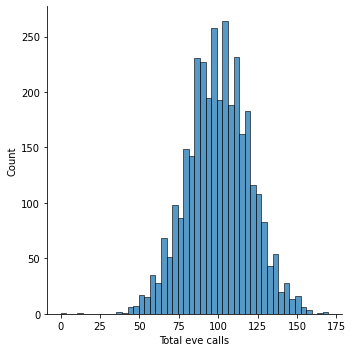

<Figure size 1224x72 with 0 Axes>

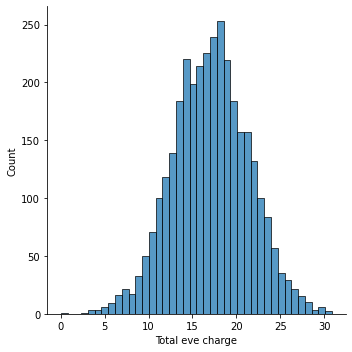

<Figure size 1224x72 with 0 Axes>

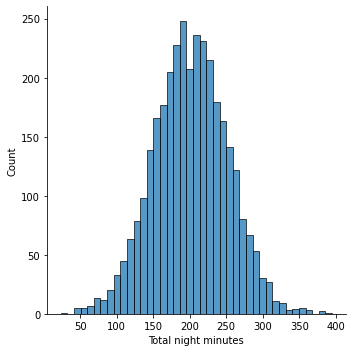

<Figure size 1224x72 with 0 Axes>

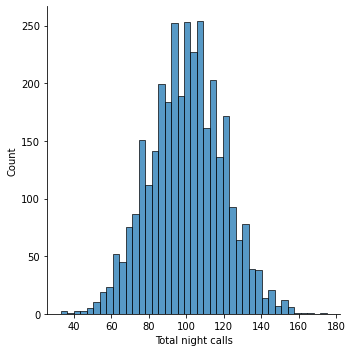

<Figure size 1224x72 with 0 Axes>

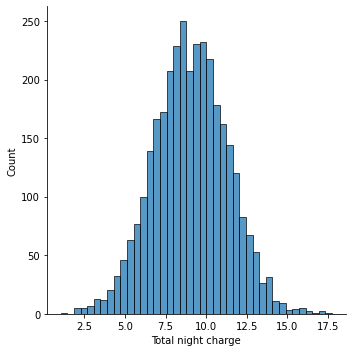

<Figure size 1224x72 with 0 Axes>

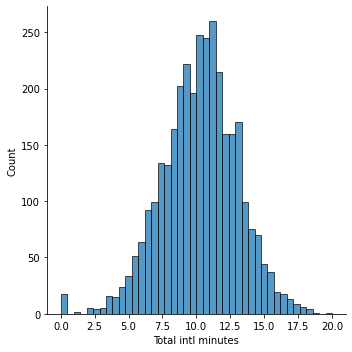

<Figure size 1224x72 with 0 Axes>

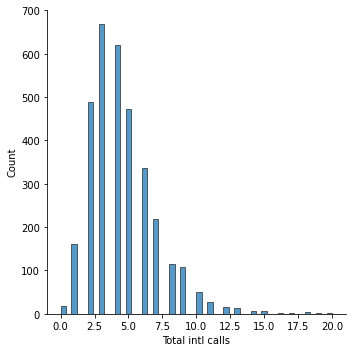

<Figure size 1224x72 with 0 Axes>

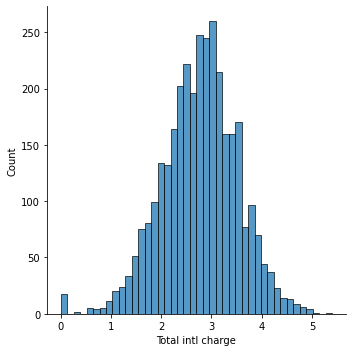

<Figure size 1224x72 with 0 Axes>

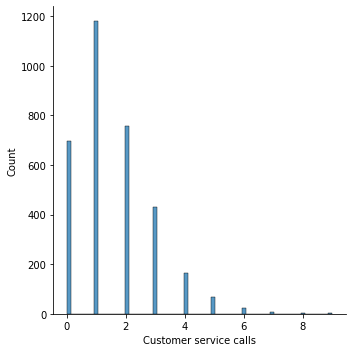

In [47]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

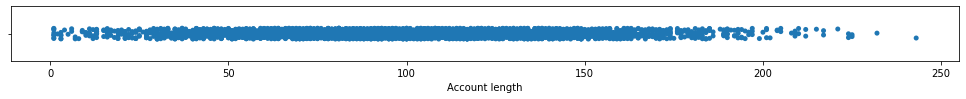

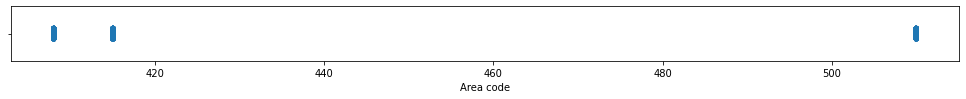

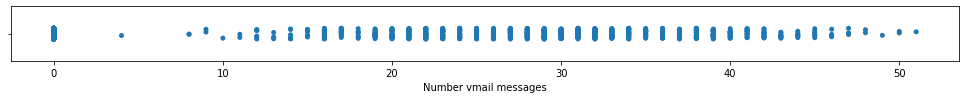

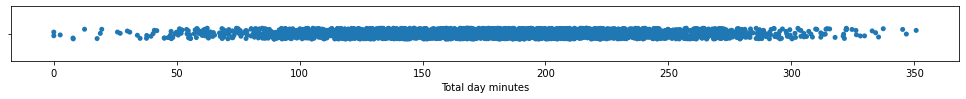

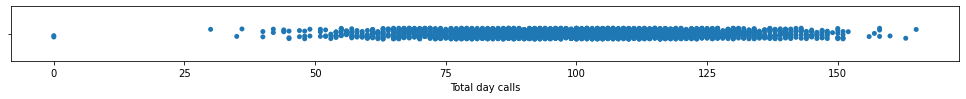

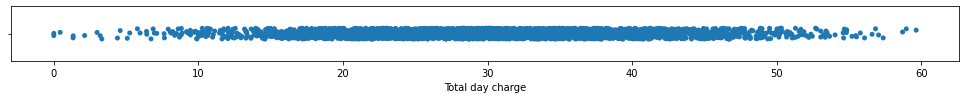

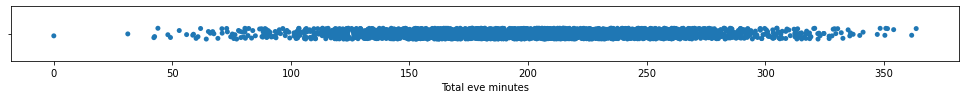

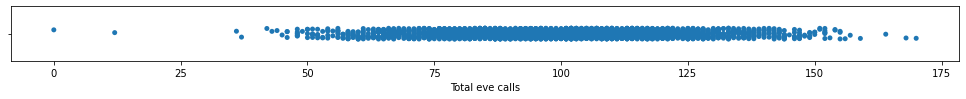

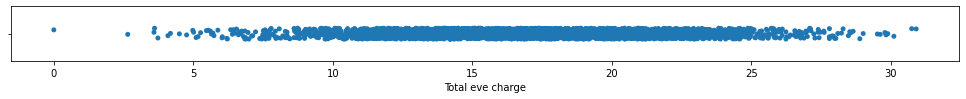

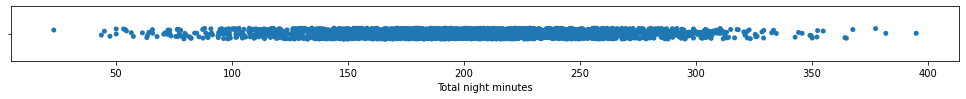

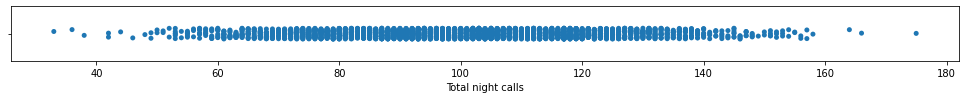

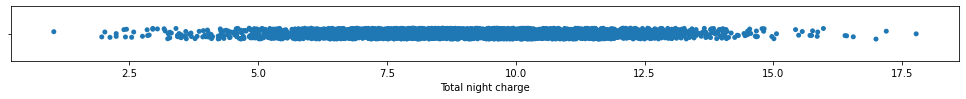

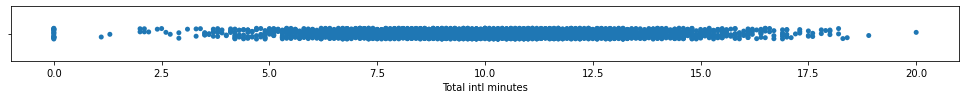

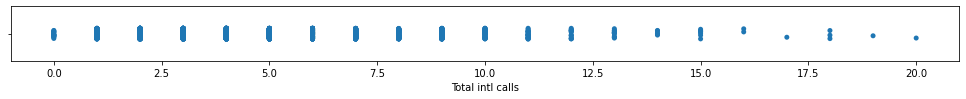

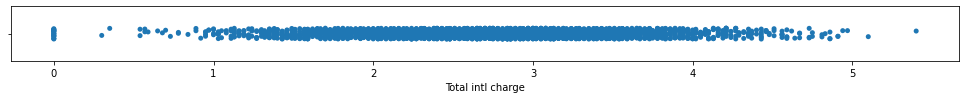

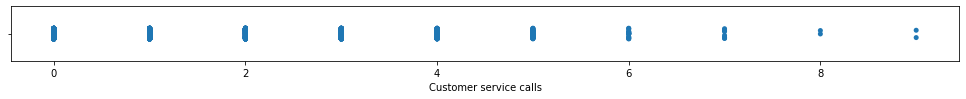

In [48]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

#BIVARIATE ANALYSIS

In Bivariate Analysis we analyze data by taking two columns into consideration from a dataset, here we only take numerical data type column, for this visualization we use Box plot,scatter plot

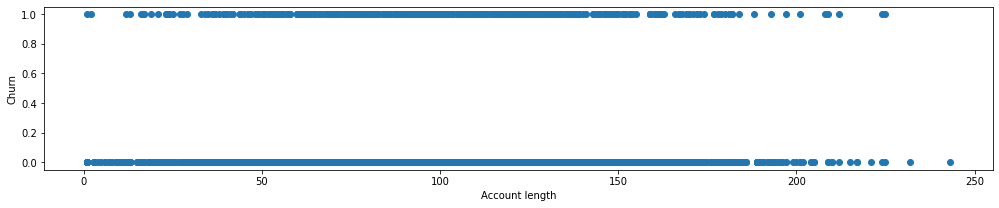

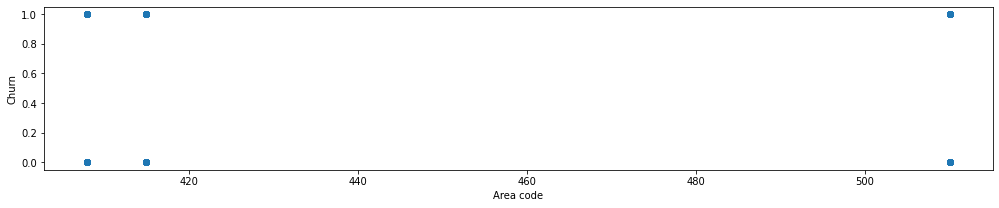

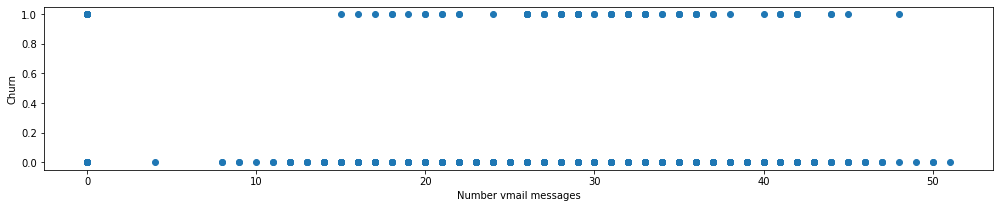

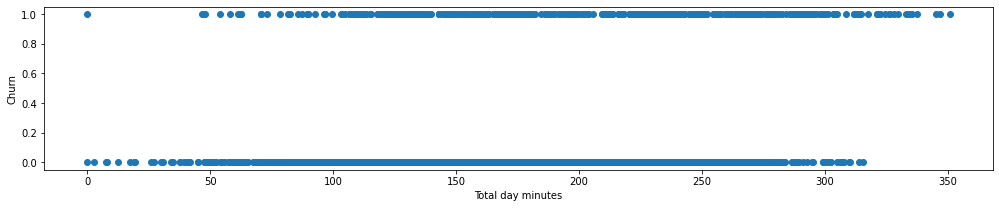

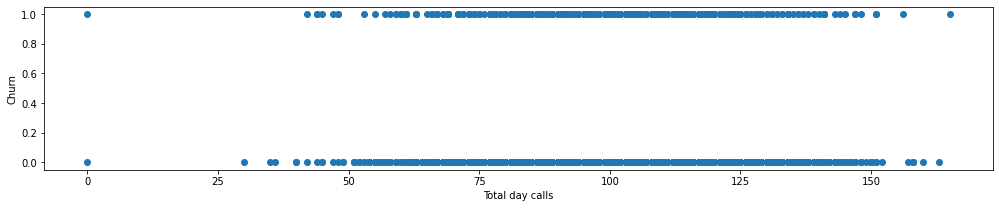

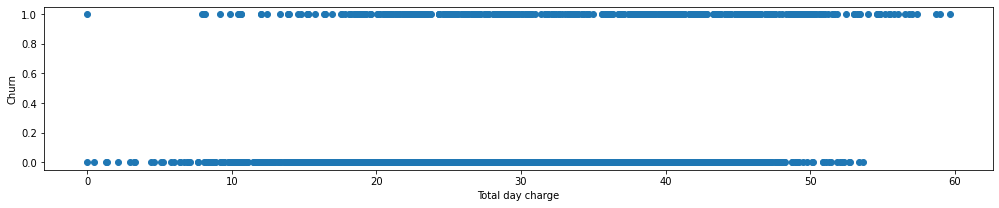

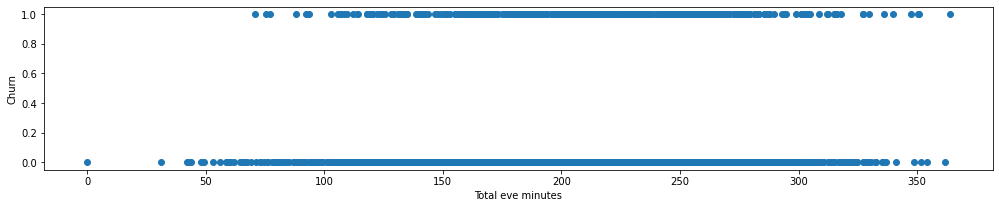

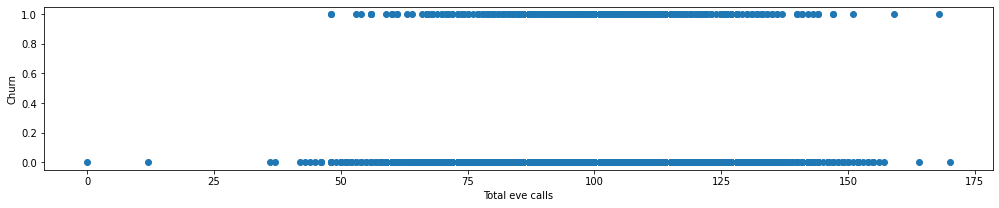

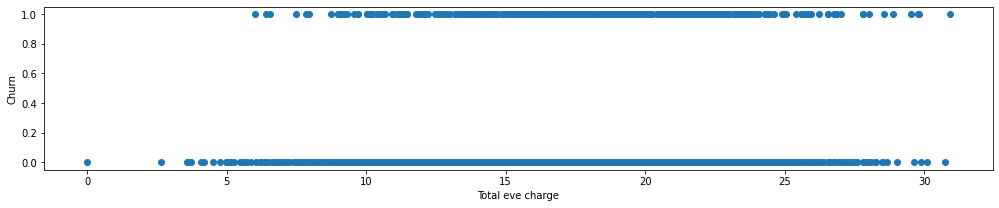

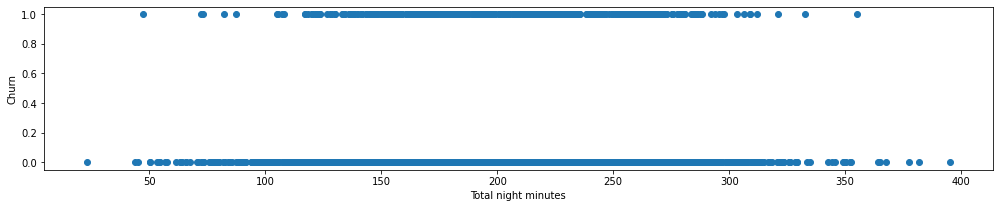

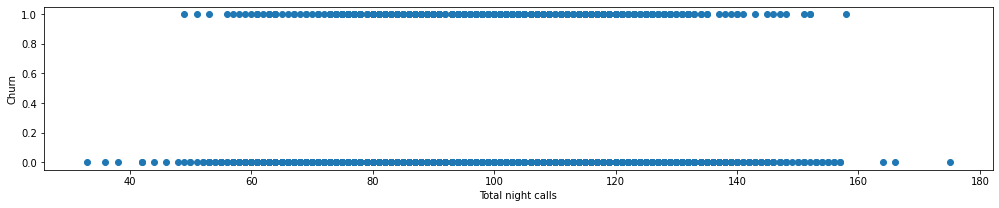

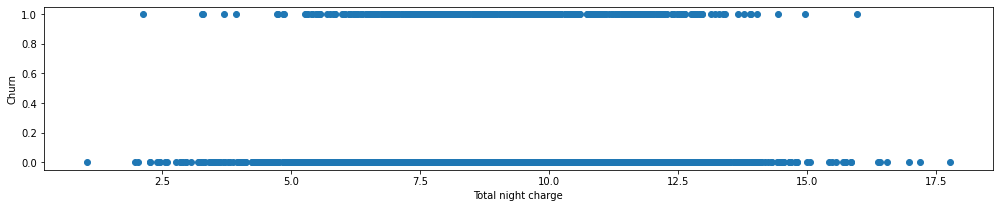

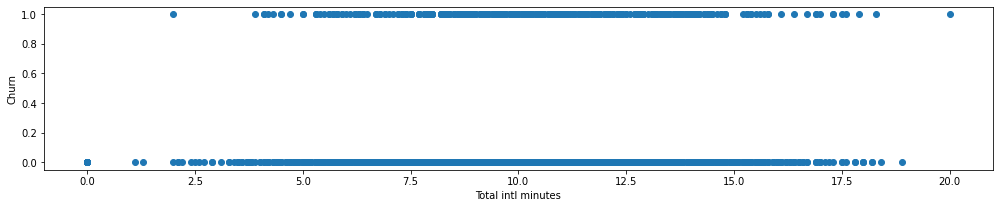

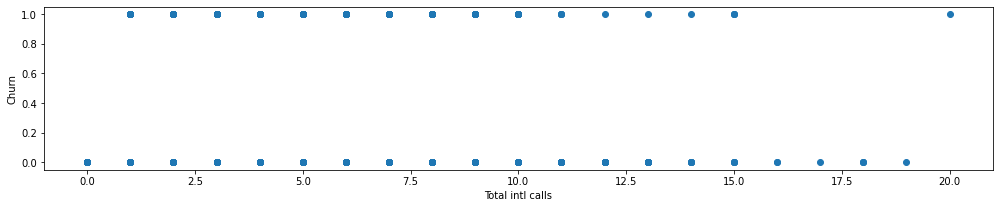

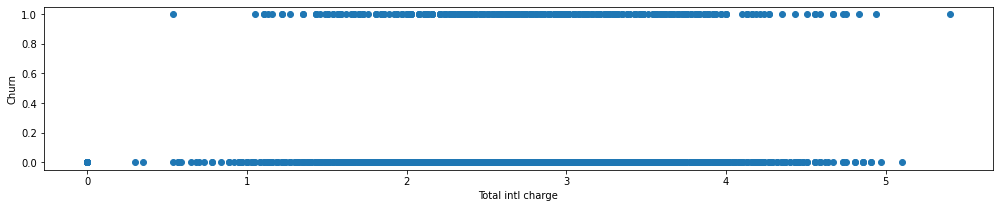

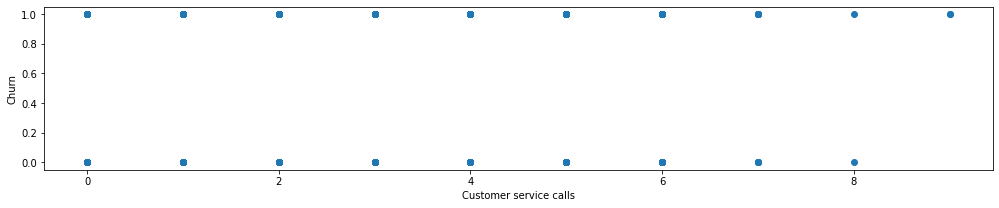

In [49]:
# Plot a boxplot for churn column  by each numerical feature present in the data set
df2= df.describe().columns
for col in df2:
  fig=plt.figure(figsize=(17,3))
  ax=fig.gca()
  feature=df[col]
  label=df['Churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Churn')
plt.show()

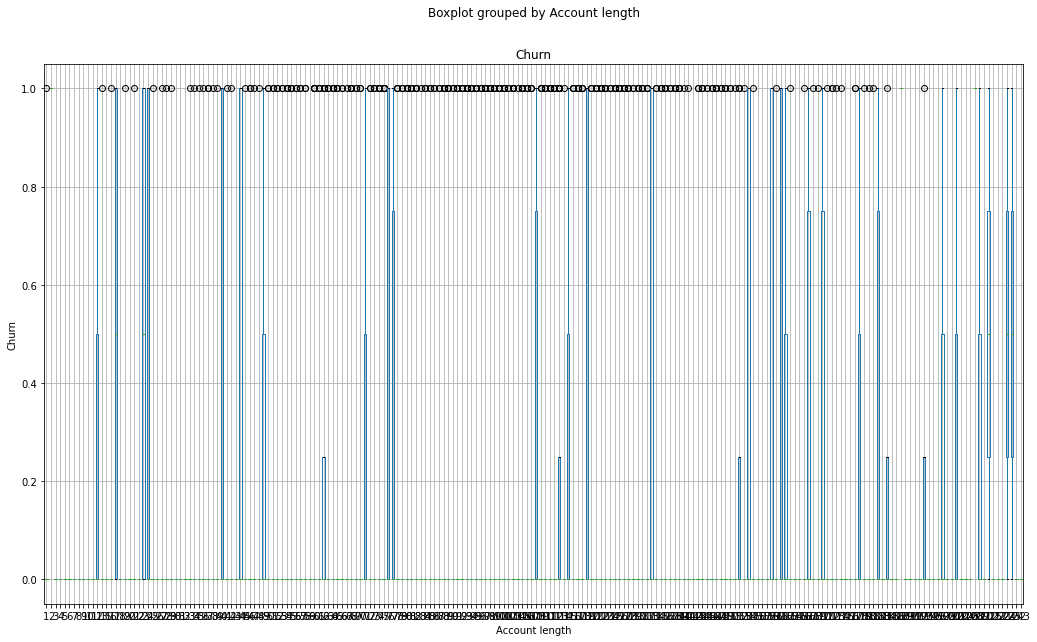

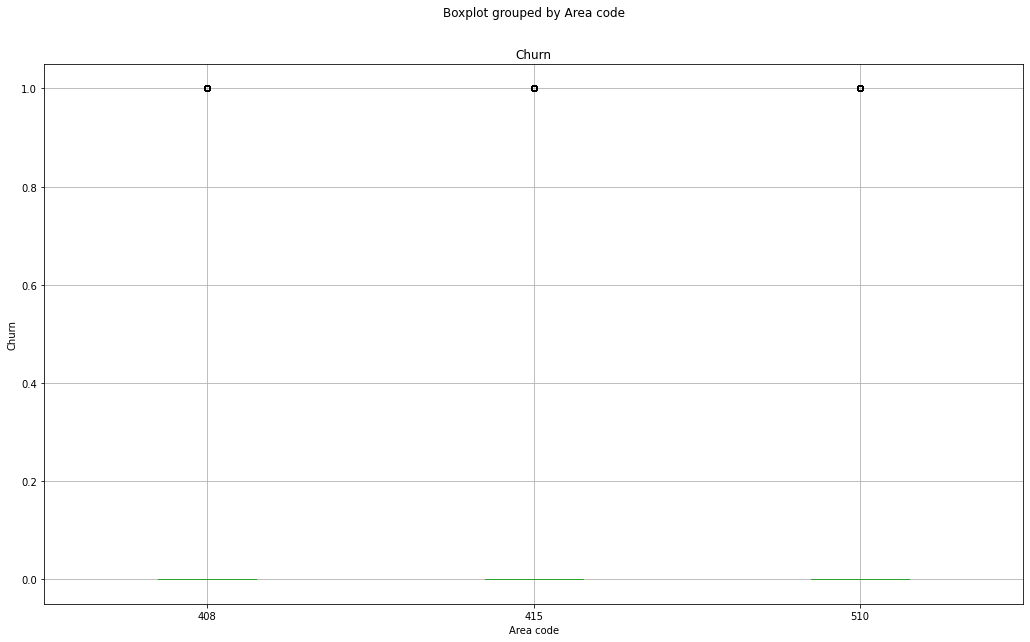

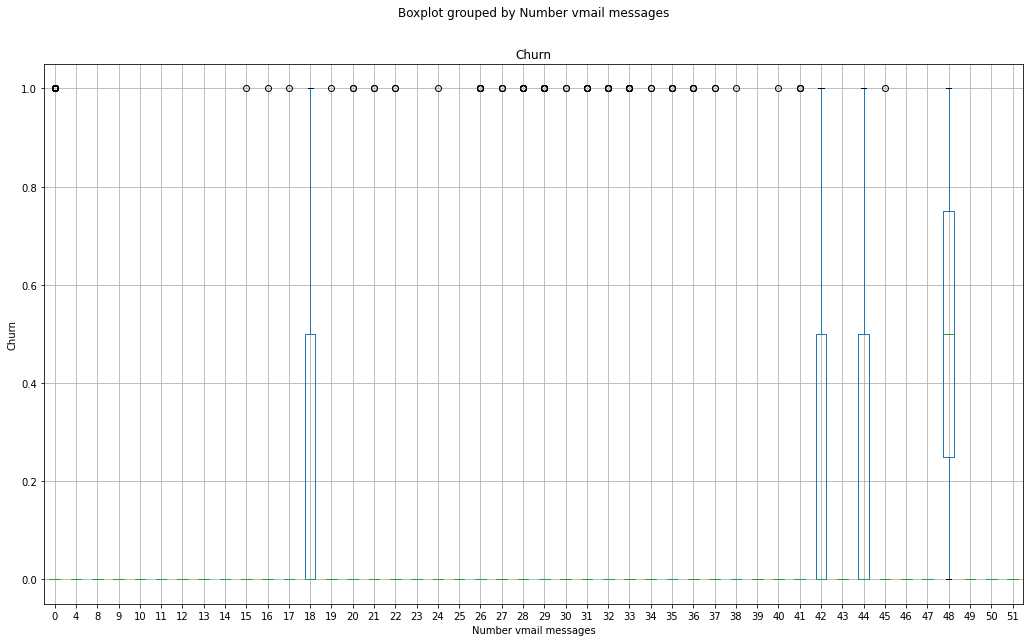

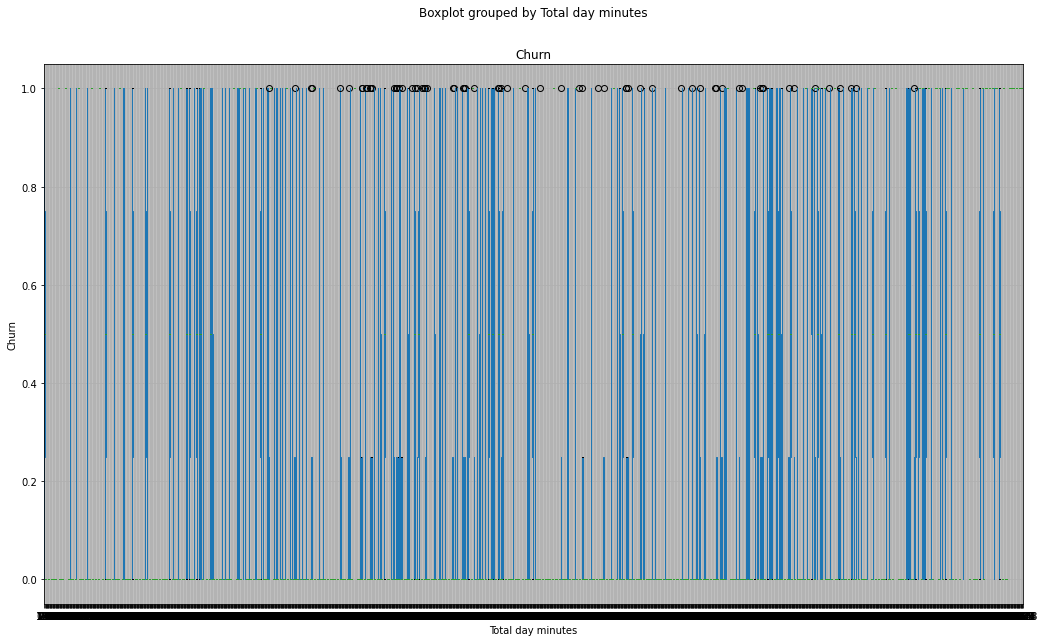

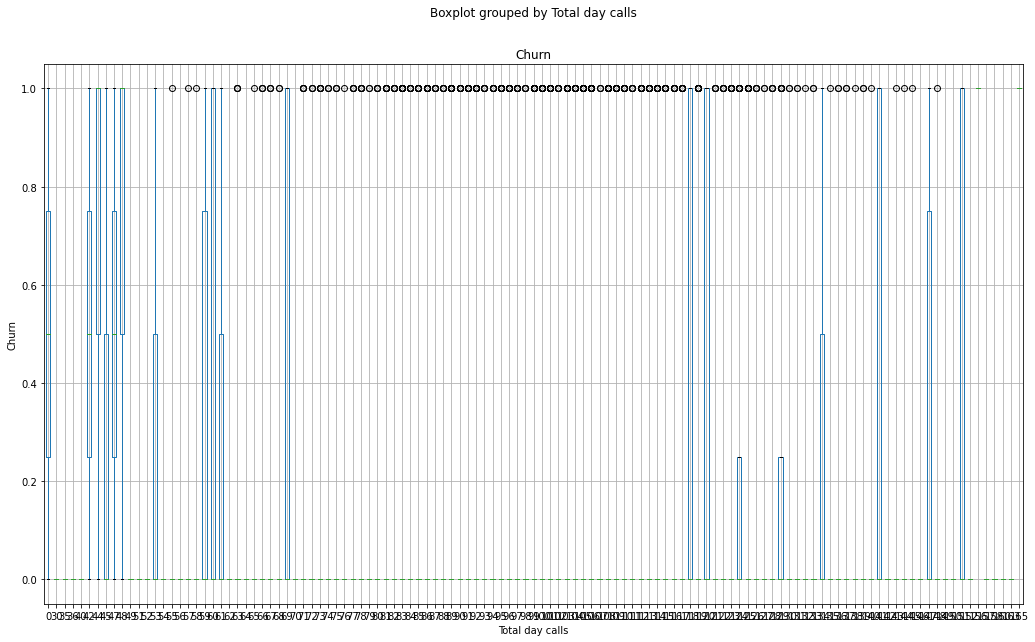

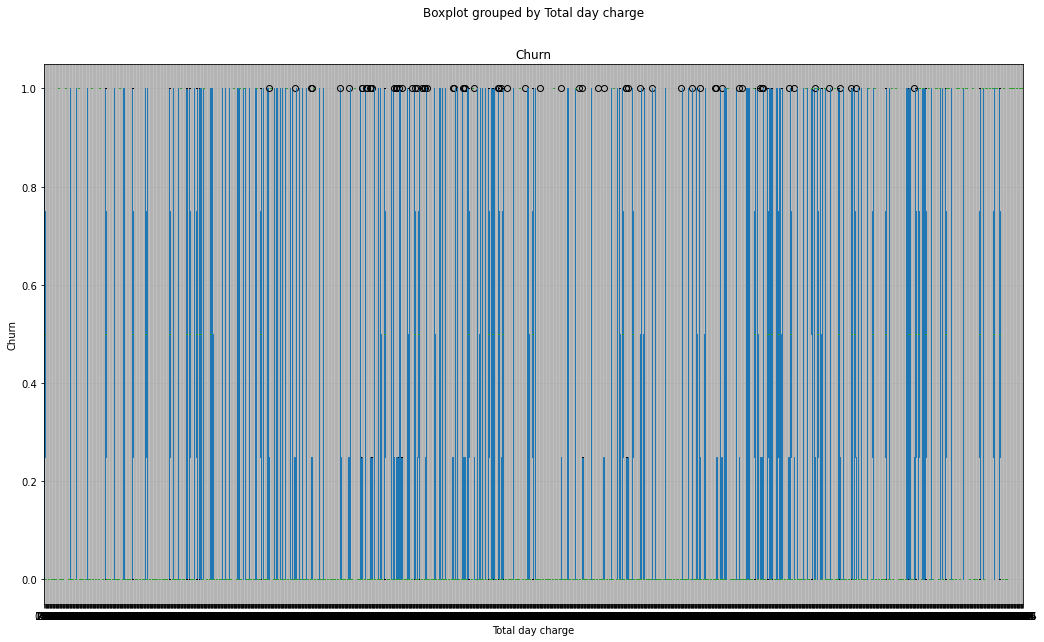

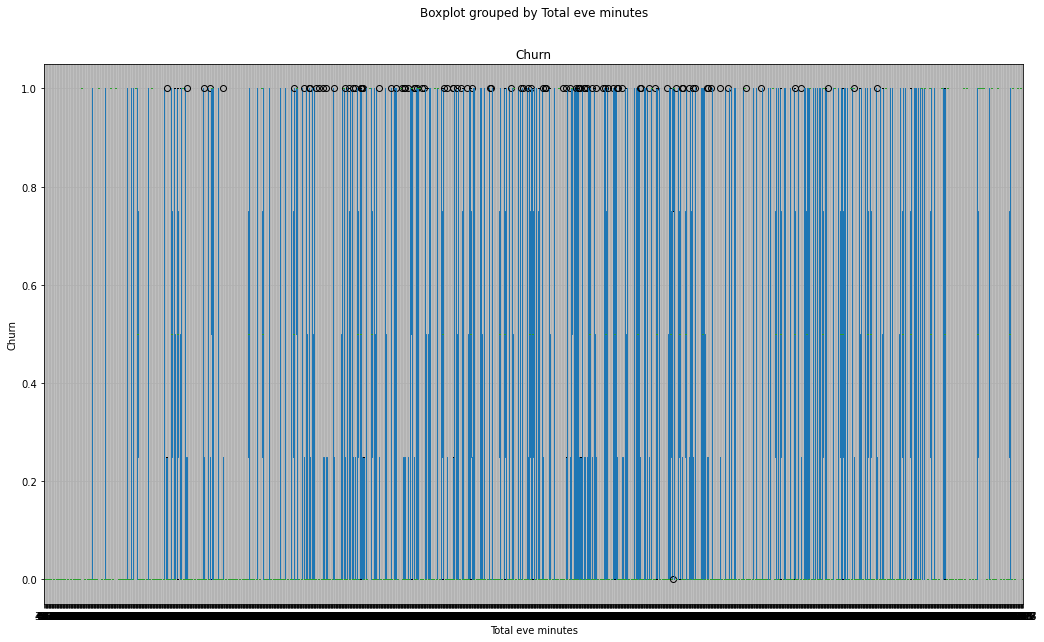

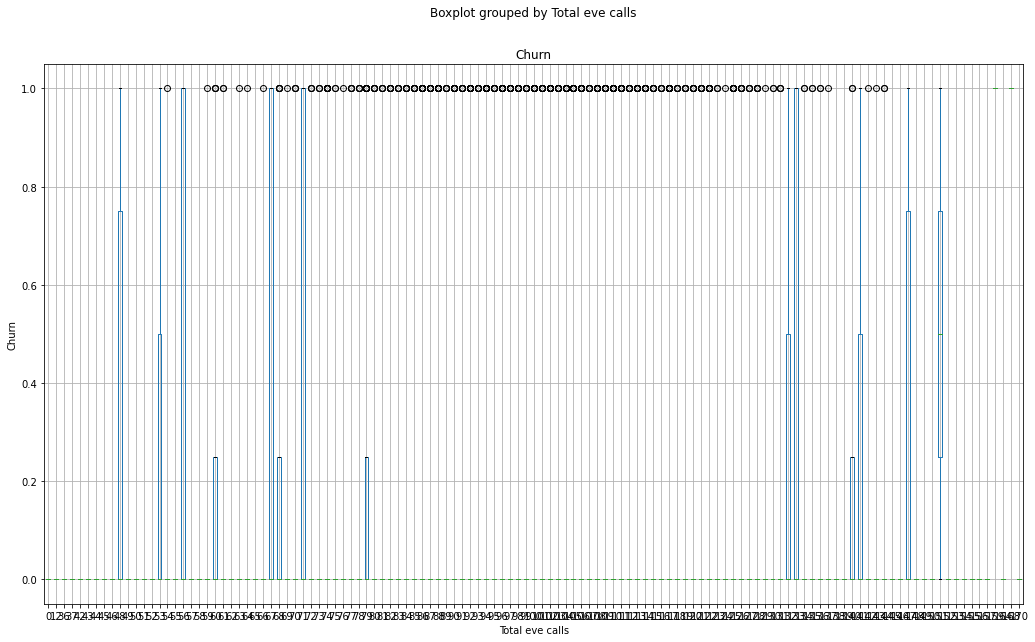

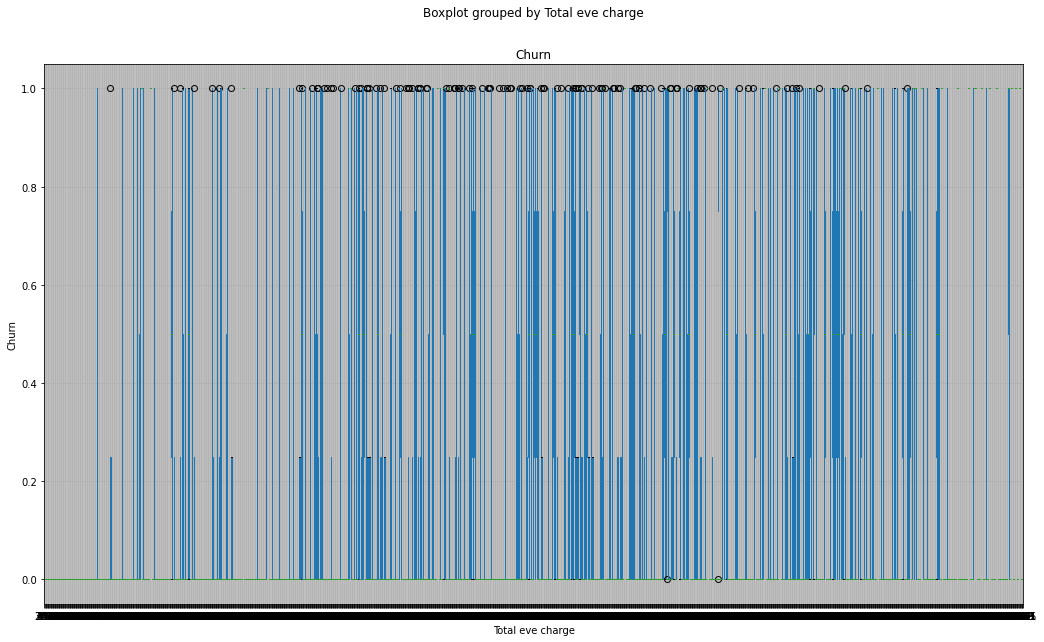

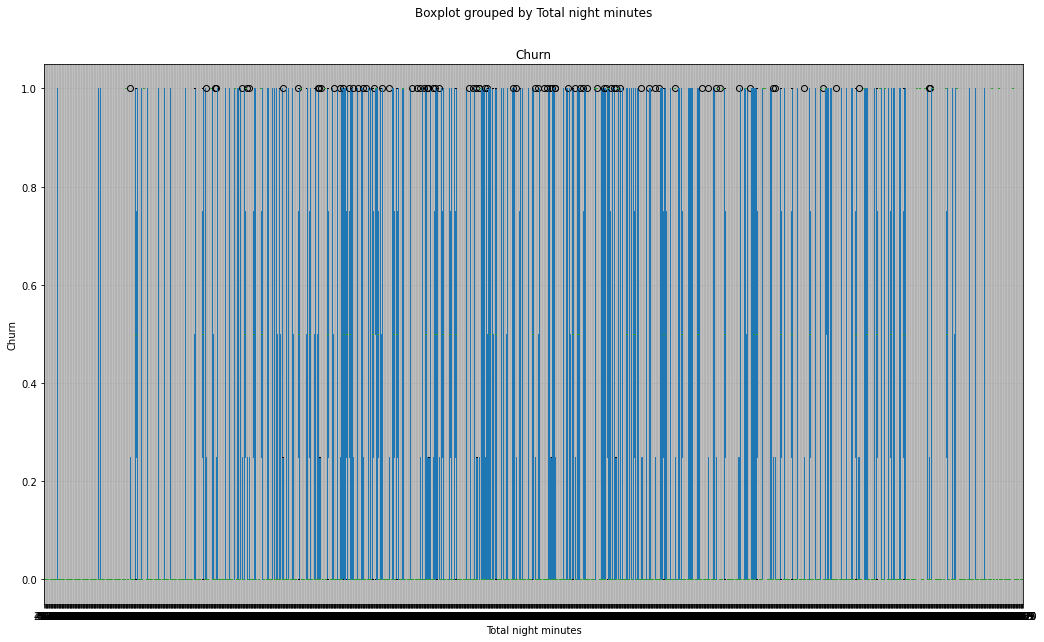

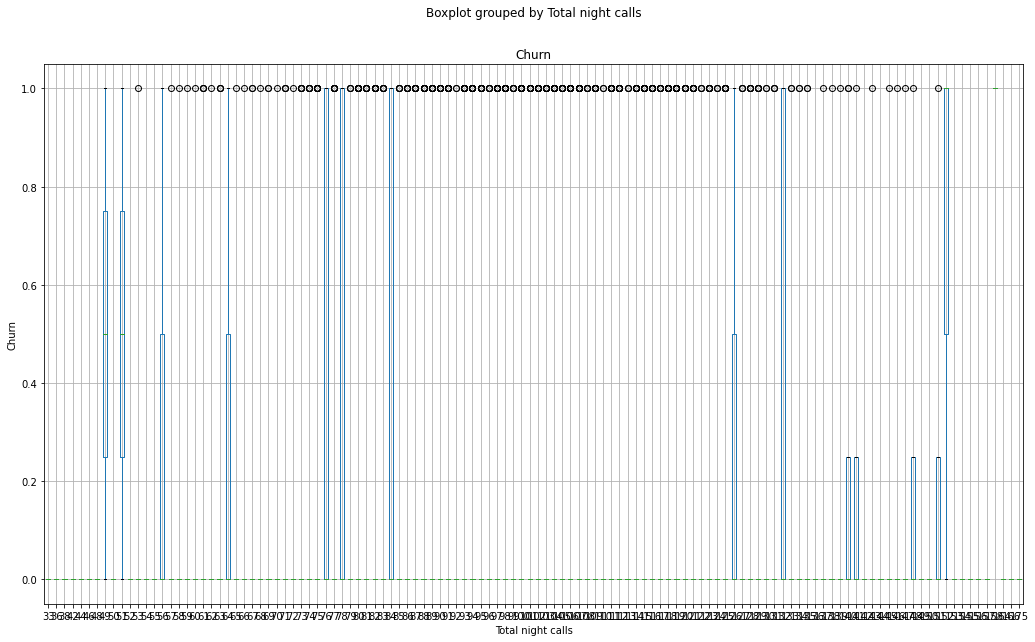

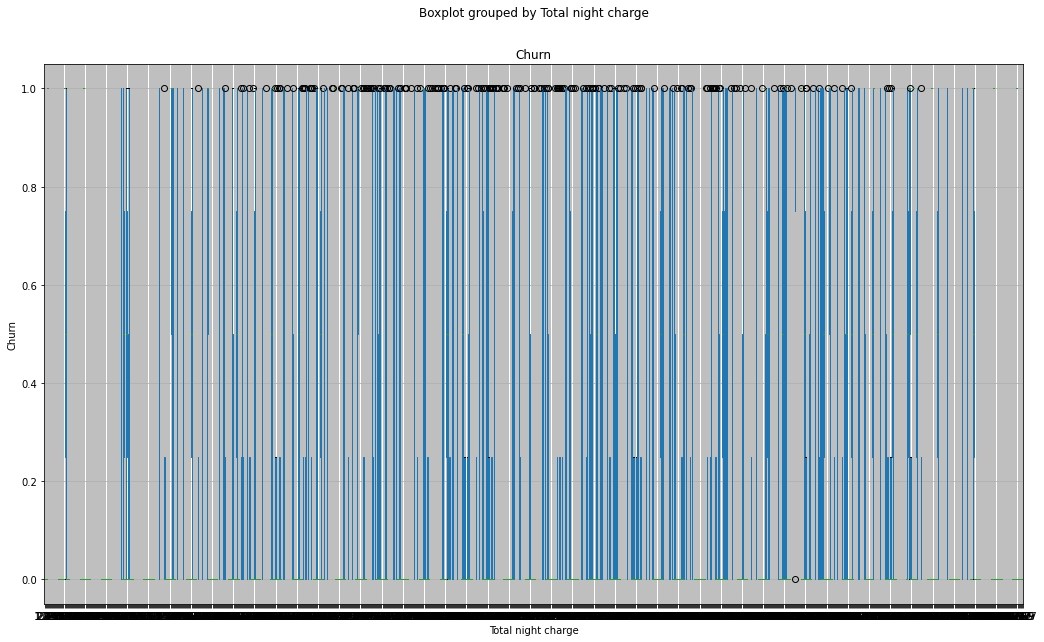

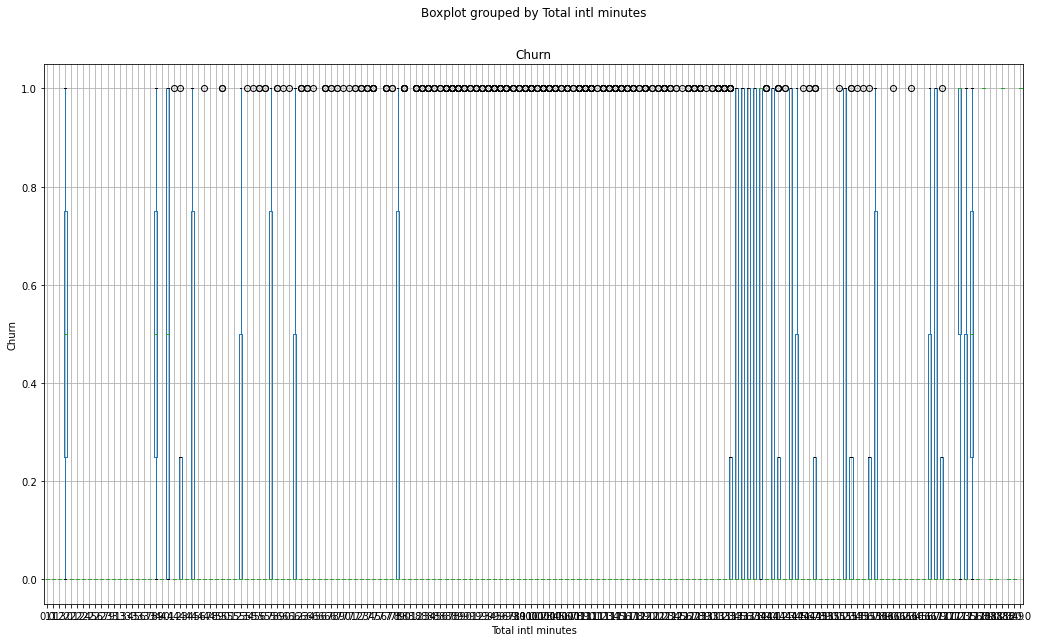

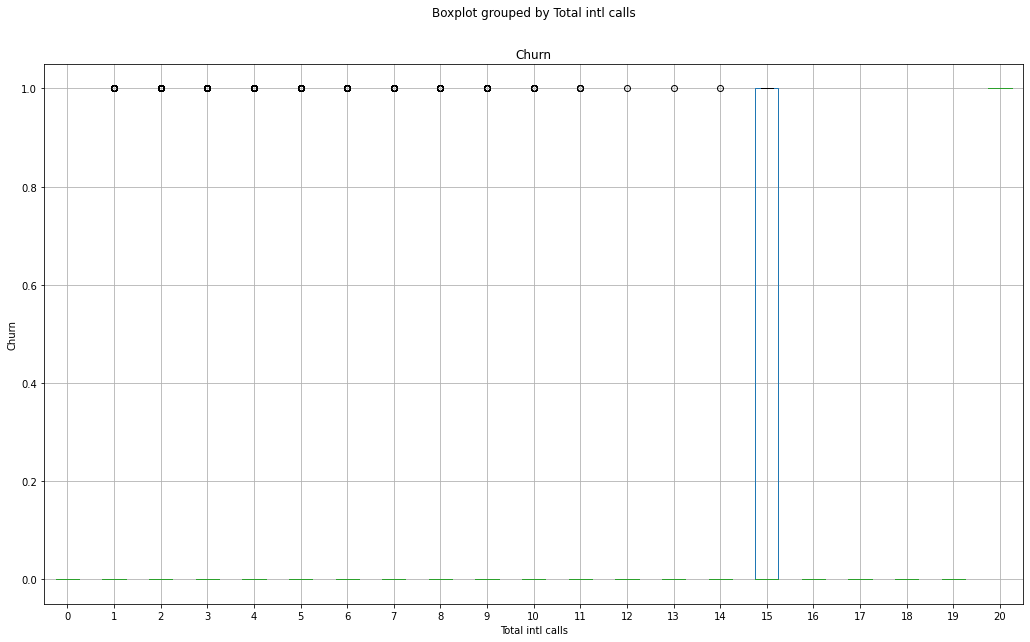

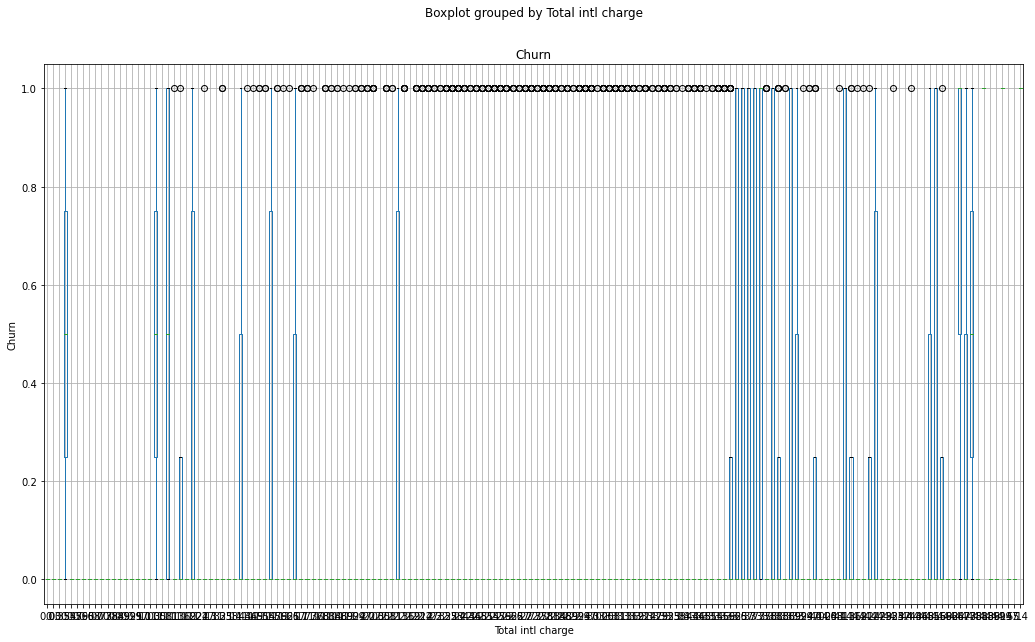

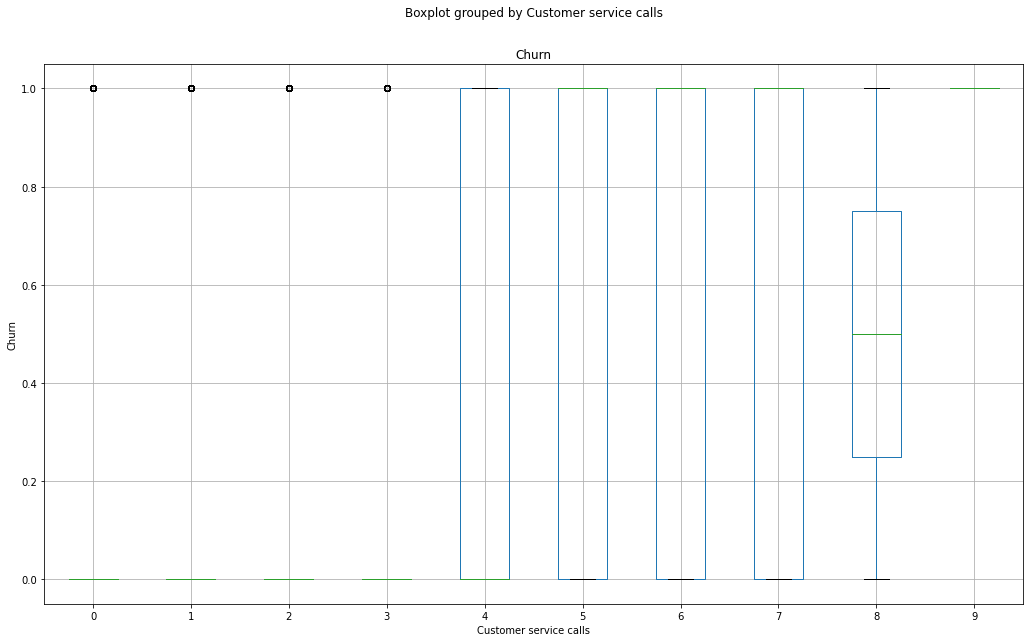

In [50]:
#Plot the box plot for churn vs all numerical column
for col in df2:
  fig=plt.figure(figsize=(17,10))
  ax=fig.gca()
  #feature=df[col]
  #label=df['Churn']
  df.boxplot(column = 'Churn', by = col, ax = ax)
  plt.xlabel(col)
  plt.ylabel('Churn')
plt.show()

#Multivariate Analysis

In Multivariate Analysis we analyze data by taking more than two columns into consideration from a dataset,for this we using correlation plot,correlation matrix, correletaion heatmap, pair plot

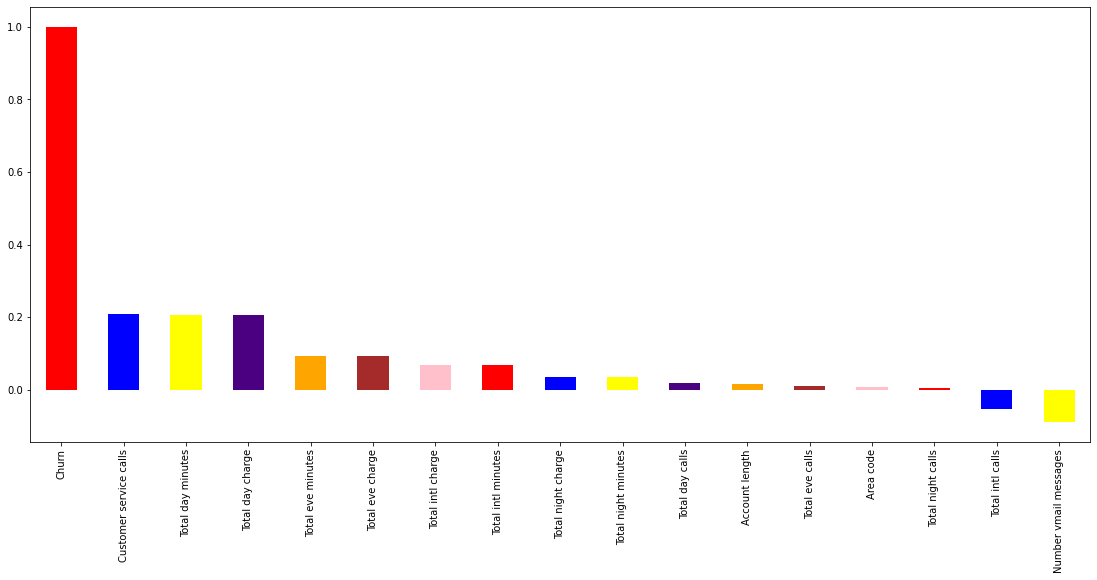

In [51]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])

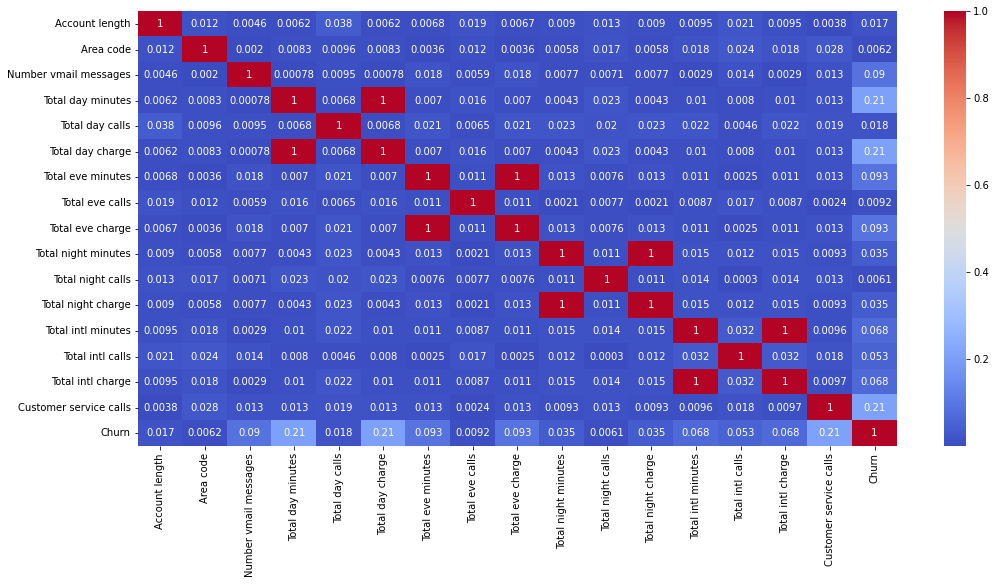

In [52]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Correlation Heatmap')

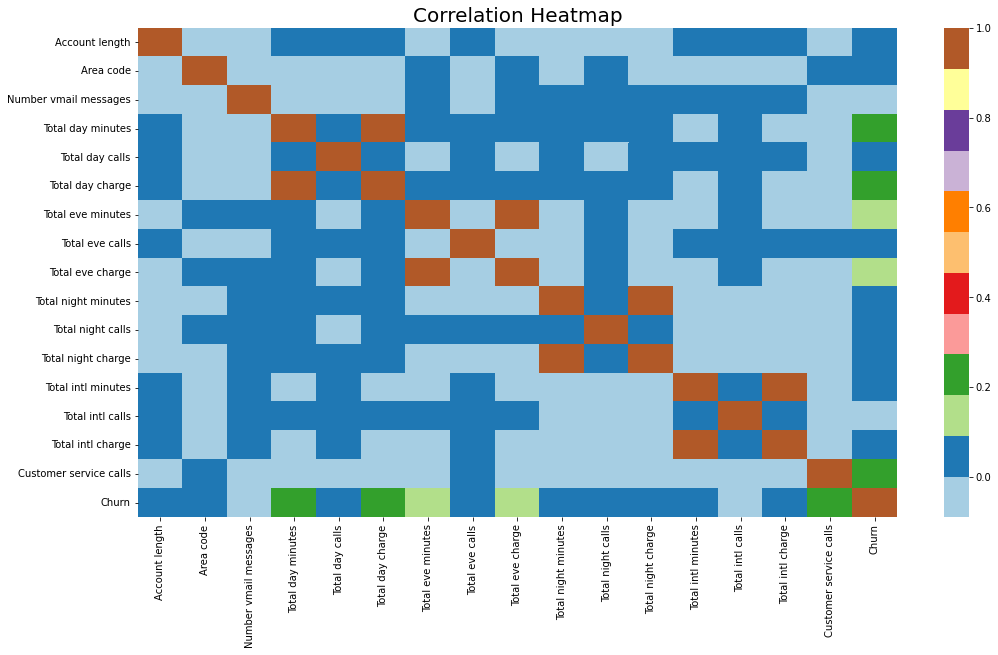

In [53]:
#create a correlation heatmap
#Assigning true=1 and False=0 to churn variable
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), cmap="Paired",annot=False)
plt.title("Correlation Heatmap", fontsize=20)

In [ ]:
#plot the pair plot for all coloumn
sns.pairplot(df, height=3)